### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir(r'C:\Users\varun.raste\Downloads\Analytics Vidya Jan Jobathon')
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


#### For detailed EDA ,we have used the pandas_profiling library

In [3]:
from pandas_profiling import ProfileReport
profile=ProfileReport(train, title='Pandas Profiling Report', explorative=True,\
                        correlations={"cramers": {"calculate": True},
                                     "phi_k": {"calculate": True},
                                     "kendall": {"calculate": True},
                                     "spearman": {"calculate": True}},\
                        missing_diagrams={"Count": True})
#profile.to_widgets()
profile.to_file(f"EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### "Understanding Resposne CLTV"

cltv is nothing but customer lifeitme value , better the value better is the customer. 

count     89392.000000
mean      97952.828978
std       90613.814793
min       24828.000000
25%       52836.000000
50%       66396.000000
75%      103440.000000
max      724068.000000
Name: cltv, dtype: float64


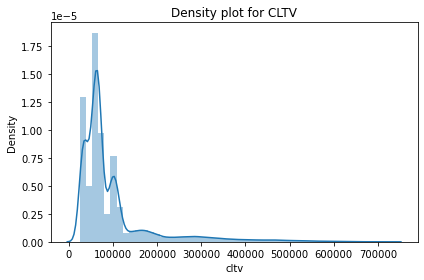

In [3]:
print(train['cltv'].describe())
sns.distplot(train['cltv'])
plt.title("Density plot for CLTV")
plt.tight_layout()
plt.show()

##### We see data is right skewed (positively skewed) with most density concentrated between [24828,103440]

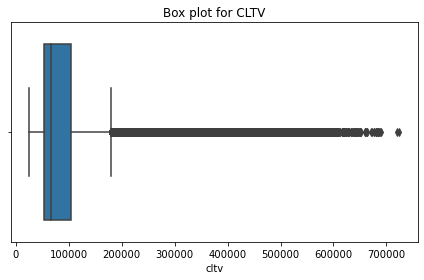

In [4]:
sns.boxplot(train['cltv'])
plt.title('Box plot for CLTV')
plt.tight_layout()

###### Box plot clearly detects presence of outliers

### Analysis of Continuous Independent variables

Correlation between claim amount & cltv is :- 0.18


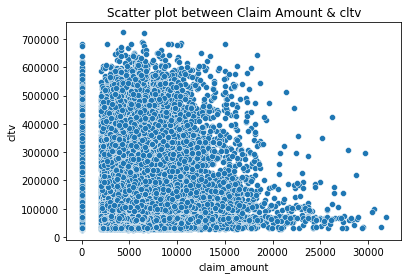

In [5]:
sns.scatterplot(x='claim_amount',y='cltv',data=train)
plt.title("Scatter plot between Claim Amount & cltv")
print(f"Correlation between claim amount & cltv is :- {round(train[['claim_amount','cltv']].corr().iloc[0,1],2)}")

Weaker correlation between claim_amount & cltv.

In [6]:
percentiles = train['claim_amount'].quantile([0.01, 0.99]).values
train['claim_amount']= np.clip(train['claim_amount'], percentiles[0], percentiles[1])

In [7]:
train['claim_amount'].describe()

count    89392.000000
mean      4322.399079
std       3137.854067
min          0.000000
25%       2406.000000
50%       4089.000000
75%       6094.000000
max      14868.090000
Name: claim_amount, dtype: float64

In [8]:
### creating new feature of people who havent claimd insurance
train['claim']=np.where(train['claim_amount']==0,0,1)
print("Proportion of users who have claimed insurance vs users who havent claimed it so far:- ")
print(f"{round(100*train['claim'].value_counts(normalize=True),2)}")

Proportion of users who have claimed insurance vs users who havent claimed it so far:- 
1    80.23
0    19.77
Name: claim, dtype: float64


### Analysis of Categorical Independent variables

gender
Male      97848.038022
Female    98088.878056
Name: cltv, dtype: float64


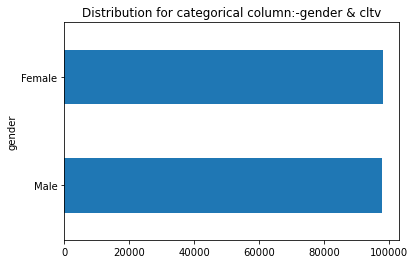

area
Rural     79587.316182
Urban    105873.921255
Name: cltv, dtype: float64


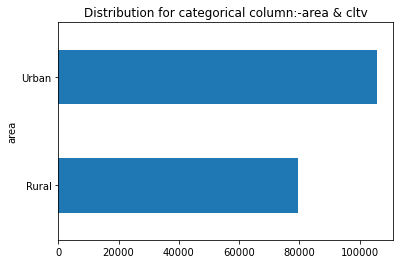

qualification
Others         77633.272824
Bachelor       98515.392675
High School    99119.447575
Name: cltv, dtype: float64


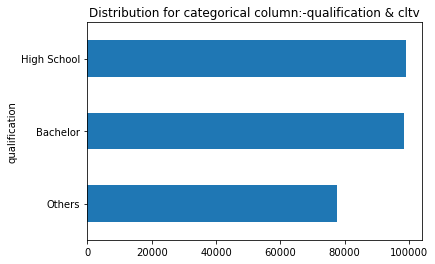

income
More than 10L     89445.767564
5L-10L            95061.906670
2L-5L            109467.408073
<=2L             111444.135922
Name: cltv, dtype: float64


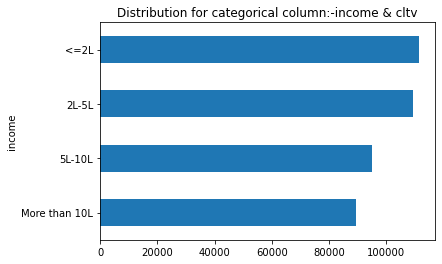

num_policies
1               50979.031618
More than 1    120658.299056
Name: cltv, dtype: float64


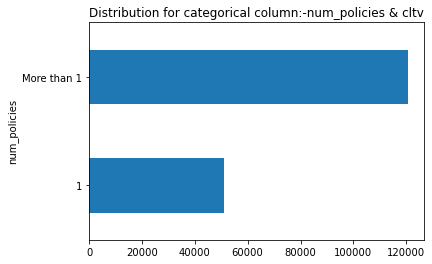

policy
B     89393.529694
A    100376.725443
C    107019.653396
Name: cltv, dtype: float64


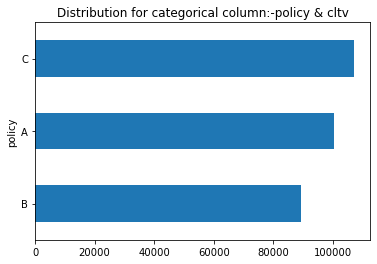

type_of_policy
Silver      92457.367539
Gold        99381.983095
Platinum    99752.960331
Name: cltv, dtype: float64


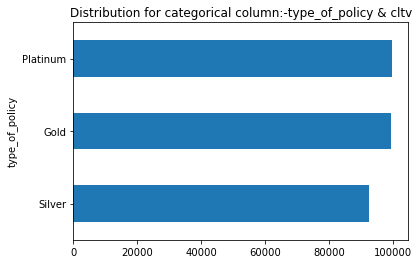

vintage
0     86972.701563
1     92467.931169
5     96148.577518
6     97614.337329
4     98144.888549
7     98412.723940
2     99822.983961
8    103711.822665
3    104415.658433
Name: cltv, dtype: float64


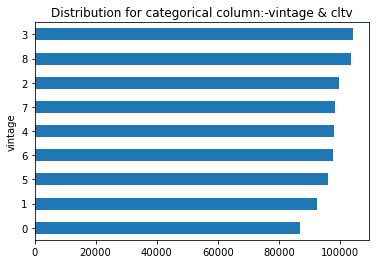

marital_status
1     91902.410777
0    106155.045536
Name: cltv, dtype: float64


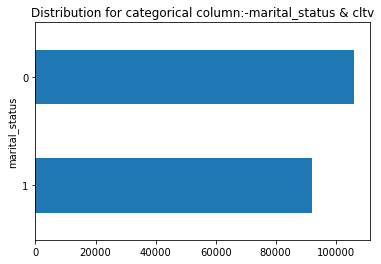

claim
0     75791.432969
1    103413.071151
Name: cltv, dtype: float64


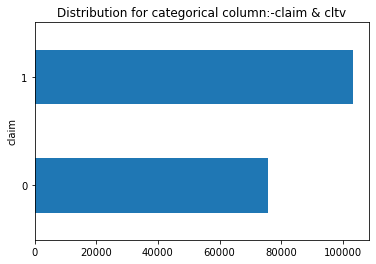

In [9]:
response='cltv'
for col in train.select_dtypes('O').columns.tolist()+['vintage','marital_status','claim']:
    print(train.groupby(col)[response].mean().sort_values())
    plt.title(f"Distribution for categorical column:-{col} & {response}")
    train.groupby(col)[response].mean().sort_values().plot(kind='barh')
    #plt.pie(train.groupby(col)[response].mean().values,labels=train.groupby(col)[response].mean().index)
    plt.show()
###

#### If we compare the means for different categories then we can see that for variables :-
1. Gender wise avg cltv doesnt changes much.
2. Area wise cltv is changing , in Urban area avg cltv is higher than rural area i.e company is rating urban area insured more than rural.
3. Qualification wise avg cltv is same across high school & Bachelor but lower avg cltv is observed if you have any other qualification.
4. For income story is interesting , i.e we are able to see a monotonic increase in avg cltv as income range decreases i.e higher income >10L have least avg CLTV & it increases and maximum if your income is less than <2L
5. Number of Policies :- Avg CLTV is much higher for users with more than 1 policies
6. Avg CLTV is same for policy name A & C but significant lower in case of policy B
7. For type of policy Silver , avg cltv is observed to be lower than Gold & Platinum policy.
8. Avg CLTV is lesser for unmarried users than married users.
9. For users who havent claimed the insurance have less avg cltv than that of those who havent claimed.

### Missingness 


In [10]:
# Please refer pandas profiling report for more details
round(train.isna().sum()/train.shape[0],2)

id                0.0
gender            0.0
area              0.0
qualification     0.0
income            0.0
marital_status    0.0
vintage           0.0
claim_amount      0.0
num_policies      0.0
policy            0.0
type_of_policy    0.0
cltv              0.0
claim             0.0
dtype: float64

No missing values in data so far

In [11]:
### Ordinal Coding

def data_transform(data):
    ### Ordinal Encoding
    data['area']=data['area'].map({'Urban':2, 'Rural':1})
    data['income']=data['income'].map({'5L-10L':2, 'More than 10L':1, '2L-5L':3, '<=2L':4})
    data['num_policies']=data['num_policies'].map({'More than 1':2, '1':1})
    data['claim']=np.where(data['claim_amount']==0,0,1)
    ### One Hot Encoding
    data=pd.get_dummies(data,columns=['type_of_policy','qualification','policy','gender'],drop_first=True)
    return data

data=data_transform(data=train)
data.head()

,id,area,income,marital_status,vintage,claim_amount,num_policies,cltv,claim,type_of_policy_Platinum,type_of_policy_Silver,qualification_High School,qualification_Others,policy_B,policy_C,gender_Male
0,1,2,2,1,5,5790.0,2,64308,1,1,0,0,0,0,0,1
1,2,1,2,0,8,5080.0,2,515400,1,1,0,1,0,0,0,1
2,3,2,2,1,8,2599.0,2,64212,1,1,0,0,0,0,0,1
3,4,1,2,0,7,0.0,2,97920,0,1,0,1,0,0,0,0
4,5,2,1,1,6,3508.0,2,59736,1,0,0,1,0,0,0,1


### Model Building

In [ ]:
from flaml import AutoML
automl_log = AutoML()
automl_log.fit(data.drop(['id','cltv'],axis=1), data['cltv'], task="regression",metric='r2',time_budget=120,estimator_list = ['lgbm'],n_splits=5)
print('Best r2 on validation data: {0:.4g}'.format(1-automl_log.best_loss))

[flaml.automl.automl: 01-22 16:27:34] {2715} INFO - task = regression
[flaml.automl.automl: 01-22 16:27:34] {2717} INFO - Data split method: uniform
[flaml.automl.automl: 01-22 16:27:34] {2720} INFO - Evaluation method: holdout
[flaml.automl.automl: 01-22 16:27:34] {2847} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 01-22 16:27:34] {2993} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.automl: 01-22 16:27:34] {3322} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 01-22 16:27:34] {3460} INFO - Estimated sufficient time budget=3380s. Estimated necessary time budget=3s.
[flaml.automl.automl: 01-22 16:27:34] {3507} INFO -  at 0.5s,	estimator lgbm's best error=0.9210,	best estimator lgbm's best error=0.9210
[flaml.automl.automl: 01-22 16:27:34] {3322} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 01-22 16:27:34] {3507} INFO -  at 0.5s,	estimator lgbm's best error=0.9210,	best estimator lgbm's best error=0.9210
[flaml.automl.auto

[flaml.automl.automl: 01-22 16:27:41] {3507} INFO -  at 7.0s,	estimator lgbm's best error=0.8492,	best estimator lgbm's best error=0.8492
[flaml.automl.automl: 01-22 16:27:41] {3322} INFO - iteration 35, current learner lgbm
[flaml.automl.automl: 01-22 16:27:41] {3507} INFO -  at 7.2s,	estimator lgbm's best error=0.8492,	best estimator lgbm's best error=0.8492
[flaml.automl.automl: 01-22 16:27:41] {3322} INFO - iteration 36, current learner lgbm
[flaml.automl.automl: 01-22 16:27:41] {3507} INFO -  at 7.7s,	estimator lgbm's best error=0.8492,	best estimator lgbm's best error=0.8492
[flaml.automl.automl: 01-22 16:27:41] {3322} INFO - iteration 37, current learner lgbm
[flaml.automl.automl: 01-22 16:27:42] {3507} INFO -  at 7.9s,	estimator lgbm's best error=0.8492,	best estimator lgbm's best error=0.8492
[flaml.automl.automl: 01-22 16:27:42] {3322} INFO - iteration 38, current learner lgbm
[flaml.automl.automl: 01-22 16:27:42] {3507} INFO -  at 8.3s,	estimator lgbm's best error=0.8492,	be

[flaml.automl.automl: 01-22 16:27:53] {3322} INFO - iteration 71, current learner lgbm
[flaml.automl.automl: 01-22 16:27:53] {3507} INFO -  at 19.6s,	estimator lgbm's best error=0.8492,	best estimator lgbm's best error=0.8492
[flaml.automl.automl: 01-22 16:27:53] {3322} INFO - iteration 72, current learner lgbm
[flaml.automl.automl: 01-22 16:27:54] {3507} INFO -  at 19.9s,	estimator lgbm's best error=0.8492,	best estimator lgbm's best error=0.8492
[flaml.automl.automl: 01-22 16:27:54] {3322} INFO - iteration 73, current learner lgbm
[flaml.automl.automl: 01-22 16:27:54] {3507} INFO -  at 20.1s,	estimator lgbm's best error=0.8492,	best estimator lgbm's best error=0.8492
[flaml.automl.automl: 01-22 16:27:54] {3322} INFO - iteration 74, current learner lgbm
[flaml.automl.automl: 01-22 16:27:54] {3507} INFO -  at 20.3s,	estimator lgbm's best error=0.8492,	best estimator lgbm's best error=0.8492
[flaml.automl.automl: 01-22 16:27:54] {3322} INFO - iteration 75, current learner lgbm
[flaml.au

[flaml.automl.automl: 01-22 16:28:04] {3507} INFO -  at 30.2s,	estimator lgbm's best error=0.8492,	best estimator lgbm's best error=0.8492
[flaml.automl.automl: 01-22 16:28:04] {3322} INFO - iteration 108, current learner lgbm
[flaml.automl.automl: 01-22 16:28:04] {3507} INFO -  at 30.4s,	estimator lgbm's best error=0.8492,	best estimator lgbm's best error=0.8492
[flaml.automl.automl: 01-22 16:28:04] {3322} INFO - iteration 109, current learner lgbm
[flaml.automl.automl: 01-22 16:28:04] {3507} INFO -  at 30.7s,	estimator lgbm's best error=0.8492,	best estimator lgbm's best error=0.8492
[flaml.automl.automl: 01-22 16:28:04] {3322} INFO - iteration 110, current learner lgbm
[flaml.automl.automl: 01-22 16:28:05] {3507} INFO -  at 30.9s,	estimator lgbm's best error=0.8492,	best estimator lgbm's best error=0.8492
[flaml.automl.automl: 01-22 16:28:05] {3322} INFO - iteration 111, current learner lgbm
[flaml.automl.automl: 01-22 16:28:05] {3507} INFO -  at 31.2s,	estimator lgbm's best error=0

[flaml.automl.automl: 01-22 16:28:17] {3322} INFO - iteration 144, current learner lgbm
[flaml.automl.automl: 01-22 16:28:17] {3507} INFO -  at 43.2s,	estimator lgbm's best error=0.8487,	best estimator lgbm's best error=0.8487
[flaml.automl.automl: 01-22 16:28:17] {3322} INFO - iteration 145, current learner lgbm
[flaml.automl.automl: 01-22 16:28:18] {3507} INFO -  at 43.9s,	estimator lgbm's best error=0.8487,	best estimator lgbm's best error=0.8487
[flaml.automl.automl: 01-22 16:28:18] {3322} INFO - iteration 146, current learner lgbm
[flaml.automl.automl: 01-22 16:28:18] {3507} INFO -  at 44.0s,	estimator lgbm's best error=0.8487,	best estimator lgbm's best error=0.8487
[flaml.automl.automl: 01-22 16:28:18] {3322} INFO - iteration 147, current learner lgbm
[flaml.automl.automl: 01-22 16:28:19] {3507} INFO -  at 45.2s,	estimator lgbm's best error=0.8487,	best estimator lgbm's best error=0.8487
[flaml.automl.automl: 01-22 16:28:19] {3322} INFO - iteration 148, current learner lgbm
[fla

[flaml.automl.automl: 01-22 16:28:33] {3507} INFO -  at 59.3s,	estimator lgbm's best error=0.8487,	best estimator lgbm's best error=0.8487
[flaml.automl.automl: 01-22 16:28:33] {3322} INFO - iteration 181, current learner lgbm
[flaml.automl.automl: 01-22 16:28:33] {3507} INFO -  at 59.5s,	estimator lgbm's best error=0.8487,	best estimator lgbm's best error=0.8487
[flaml.automl.automl: 01-22 16:28:33] {3322} INFO - iteration 182, current learner lgbm
[flaml.automl.automl: 01-22 16:28:33] {3507} INFO -  at 59.8s,	estimator lgbm's best error=0.8487,	best estimator lgbm's best error=0.8487
[flaml.automl.automl: 01-22 16:28:33] {3322} INFO - iteration 183, current learner lgbm
[flaml.automl.automl: 01-22 16:28:34] {3507} INFO -  at 60.1s,	estimator lgbm's best error=0.8487,	best estimator lgbm's best error=0.8487
[flaml.automl.automl: 01-22 16:28:34] {3322} INFO - iteration 184, current learner lgbm
[flaml.automl.automl: 01-22 16:28:34] {3507} INFO -  at 60.7s,	estimator lgbm's best error=0

[flaml.automl.automl: 01-22 16:28:46] {3322} INFO - iteration 217, current learner lgbm
[flaml.automl.automl: 01-22 16:28:46] {3507} INFO -  at 72.2s,	estimator lgbm's best error=0.8487,	best estimator lgbm's best error=0.8487
[flaml.automl.automl: 01-22 16:28:46] {3322} INFO - iteration 218, current learner lgbm
[flaml.automl.automl: 01-22 16:28:46] {3507} INFO -  at 72.4s,	estimator lgbm's best error=0.8487,	best estimator lgbm's best error=0.8487
[flaml.automl.automl: 01-22 16:28:46] {3322} INFO - iteration 219, current learner lgbm
[flaml.automl.automl: 01-22 16:28:47] {3507} INFO -  at 72.9s,	estimator lgbm's best error=0.8487,	best estimator lgbm's best error=0.8487
[flaml.automl.automl: 01-22 16:28:47] {3322} INFO - iteration 220, current learner lgbm
[flaml.automl.automl: 01-22 16:28:47] {3507} INFO -  at 73.1s,	estimator lgbm's best error=0.8487,	best estimator lgbm's best error=0.8487
[flaml.automl.automl: 01-22 16:28:47] {3322} INFO - iteration 221, current learner lgbm
[fla

[flaml.automl.automl: 01-22 16:28:59] {3507} INFO -  at 85.7s,	estimator lgbm's best error=0.8487,	best estimator lgbm's best error=0.8487
[flaml.automl.automl: 01-22 16:28:59] {3322} INFO - iteration 254, current learner lgbm
[flaml.automl.automl: 01-22 16:29:00] {3507} INFO -  at 86.7s,	estimator lgbm's best error=0.8487,	best estimator lgbm's best error=0.8487
[flaml.automl.automl: 01-22 16:29:00] {3322} INFO - iteration 255, current learner lgbm
[flaml.automl.automl: 01-22 16:29:01] {3507} INFO -  at 86.9s,	estimator lgbm's best error=0.8487,	best estimator lgbm's best error=0.8487
[flaml.automl.automl: 01-22 16:29:01] {3322} INFO - iteration 256, current learner lgbm
[flaml.automl.automl: 01-22 16:29:01] {3507} INFO -  at 87.3s,	estimator lgbm's best error=0.8487,	best estimator lgbm's best error=0.8487
[flaml.automl.automl: 01-22 16:29:01] {3322} INFO - iteration 257, current learner lgbm
[flaml.automl.automl: 01-22 16:29:01] {3507} INFO -  at 87.6s,	estimator lgbm's best error=0

In [ ]:
feature_importance = automl_log.feature_importances_
sorted_idx = np.argsort(feature_importance)[-25:]

fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(data.drop(['id','cltv'],axis=1).columns)[sorted_idx])
plt.title('Feature Importance')

### Test Data

In [ ]:
### Predicting on test dataset
test=pd.read_csv('test.csv')
test_data=data_transform(data=test)
test_data.head()

In [ ]:
test['cltv']=automl_log.predict(test_data.drop(['id'],axis=1))
test[['id','cltv']].to_csv('LightGBM_No_Transform_Outlier_Treat.csv',index=False)

In [ ]:
test.head()

### Ensemble Approach

In [17]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
reg_xgb=XGBRegressor(random_state=123,n_estimators= 14, max_leaves= 5, min_child_weight= 23.304007391002425, learning_rate= 0.3520489575856527, subsample= 0.9293046029829143, colsample_bylevel= 1.0, colsample_bytree= 0.6066646061109678, reg_alpha= 0.006215944959600305, reg_lambda= 3.7241744662794094)
reg_lighgbm=LGBMRegressor(random_state=123,n_estimators=43, num_leaves=8, min_child_samples=16, learning_rate=0.17113311858654137, log_max_bin=7, colsample_bytree=0.5994753538683965,reg_alpha=0.0033143387672991734, reg_lambda=281.829238191958)          
test['cltv']=0.5*reg_xgb.fit(data.drop(['id','cltv'],axis=1), data['cltv']).predict(test_data.drop(['id'],axis=1))+0.5*reg_lighgbm.fit(data.drop(['id','cltv'],axis=1), data['cltv']).predict(test_data.drop(['id'],axis=1))
test[['id','cltv']].to_csv('Ensemble_No_Transform_Outlier_Treat.csv',index=False)

[LightGBM] [Warning] Unknown parameter: log_max_bin


### PyCaret Approach